## Ayudantía 4 

### Profesor: Luis Cossio
### Ayudante: Gabriel Díaz

# Métricas de Evaluación de Modelos de Clasificación

Cuando entrenamos un modelo de clasificación, necesitamos formas **objetivas** de medir su desempeño. Para esto usamos **métricas de evaluación**, las cuales se calculan a partir de la **matriz de confusión**.

---

## Matriz de Confusión

La matriz de confusión compara los valores **reales** con los **predichos** por el modelo:

| Real \ Predicho | Predijo 0 | Predijo 1 |
|------------------|-----------|-----------|
| **Era 0**        | TN        | FP        |
| **Era 1**        | FN        | TP        |

- **TP (True Positive)**: Predijo 1 y era 1 → acierto positivo.
- **TN (True Negative)**: Predijo 0 y era 0 → acierto negativo.
- **FP (False Positive)**: Predijo 1 pero era 0 → falsa alarma.
- **FN (False Negative)**: Predijo 0 pero era 1 → no detectó un positivo.

---

## Principales Métricas

- **Accuracy (Exactitud)**:
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$
  Proporción total de aciertos.

- **Precision (Precisión)**:
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
  Qué tan confiables son las predicciones positivas.

- **Recall (Sensibilidad)**:
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$
  Qué tan bien detecta los positivos reales.

- **F1-Score**:
  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
  Equilibrio entre precisión y recall.

---

## ¿Cuándo usar cada una?

- Usa **accuracy** si las clases están balanceadas.
- Usa **precision** si quieres evitar falsos positivos (por ejemplo, spam).
- Usa **recall** si quieres evitar falsos negativos (por ejemplo, cáncer).
- Usa **F1-score** si quieres un balance entre ambos.



In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Para escalar los datos
from sklearn.preprocessing import StandardScaler
#Para el clasificador KNN
from sklearn.neighbors import KNeighborsClassifier
#Para las metricas de rendimiento
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [22]:
# 1. Cargar dataset y preparar datos
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
# Crear variable binaria: ¿es corte "Ideal"?
df['ideal_cut'] = (df['cut'] == 'Ideal').astype(int)

# Seleccionar algunas variables numéricas y la clase nueva
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = df[features]
y = df['ideal_cut']

# 2. Escalar y dividir los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ideal_cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [25]:
#Sumar todos los ideal_cut
df['ideal_cut'].sum()

np.int64(21551)

In [26]:
# Entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicción
# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# Evaluar métricas
print("Matriz de Confusión:")
print(matriz)

Matriz de Confusión:
[[5687  809]
 [ 552 3740]]


In [27]:
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6496
           1       0.82      0.87      0.85      4292

    accuracy                           0.87     10788
   macro avg       0.87      0.87      0.87     10788
weighted avg       0.88      0.87      0.87     10788



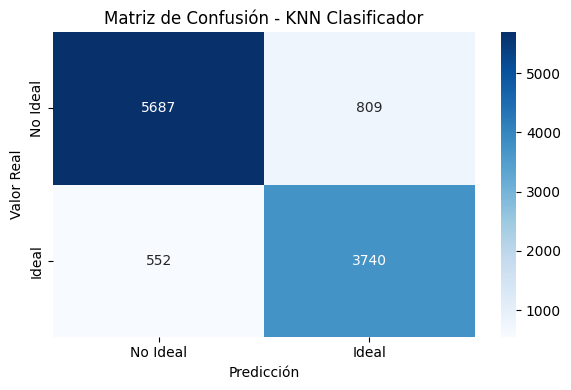

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame para la matriz de confusión
# Crear mapa de calor
#matriz= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=["No Ideal", "Ideal"], yticklabels=["No Ideal", "Ideal"])
plt.title("Matriz de Confusión - KNN Clasificador")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [29]:
# libreria para el clasificador de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = sns.load_dataset("diamonds")

# Crear variable binaria: 1 si el corte es 'Ideal', 0 en caso contrario
df['ideal_cut'] = (df['cut'] == 'Ideal').astype(int)

# Variables predictoras (numéricas)
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = df[features]
y = df['ideal_cut']

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Realizar predicciones
y_pred_log = modelo_log.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log))

print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred_log))


Matriz de Confusión:
[[5436 1060]
 [1112 3180]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      6496
           1       0.75      0.74      0.75      4292

    accuracy                           0.80     10788
   macro avg       0.79      0.79      0.79     10788
weighted avg       0.80      0.80      0.80     10788



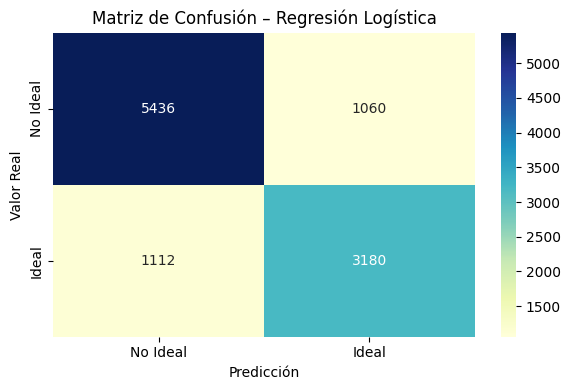

In [30]:
# Calcular matriz
matriz_log = confusion_matrix(y_test, y_pred_log)

# Gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_log, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["No Ideal", "Ideal"],
            yticklabels=["No Ideal", "Ideal"])
plt.title("Matriz de Confusión – Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


## ¿Qué hacer si las métricas del modelo no son buenas?

A veces, entrenamos un modelo de clasificación (como KNN o Regresión Logística) y sus resultados no son satisfactorios.  
Esto puede verse reflejado en una **precisión baja**, **recall pobre** o muchos **errores en la matriz de confusión**.

Aquí van algunas estrategias reales que se usan en la práctica para **mejorar el desempeño** del modelo:

---

### 1. Recolectar más datos

Más datos → mejor representación del problema → mayor capacidad de generalización del modelo.  
Si el dataset es pequeño o poco variado, el modelo puede estar aprendiendo “casos raros” o ruido.

---

### 2. Selección y transformación de variables

- **Eliminar variables irrelevantes** o ruidosas.
- **Crear nuevas variables** a partir de otras (feature engineering).
- **Aplicar escalamiento o normalización** si las variables tienen diferentes magnitudes (¡crucial para modelos como KNN o Regresión Logística!).

---

### 3. Balancear las clases

Si una clase es mucho más frecuente que la otra, el modelo puede estar sesgado.  
Soluciones:
- **Undersampling** de la clase mayoritaria.
- **Oversampling** de la clase minoritaria.
- Técnicas como **SMOTE**.

---

### 4. Probar otros algoritmos

No todos los modelos funcionan igual para todos los problemas.  
Si KNN o Regresión Logística no rinden bien, puedes probar:
- Árboles de decisión
- Random Forest
- Naive Bayes
- SVM
- Modelos basados en boosting (XGBoost, LightGBM)

---

### 5. Ajustar hiperparámetros (tuning)

Muchos modelos tienen parámetros que afectan su comportamiento.  
Por ejemplo:
- `n_neighbors` en KNN
- `C` en Regresión Logística
- `max_depth` en Árboles

Puedes usar técnicas como **GridSearchCV** o **RandomizedSearchCV** para encontrar los mejores valores.

---

### 6. Validación cruzada

Evita que el rendimiento dependa de una sola división entrenamiento/prueba.  
La **validación cruzada k-fold** permite evaluar el modelo más objetivamente y mejora su robustez.

---

### 7. Limpiar y tratar datos nulos o extremos

- Reemplazar o eliminar outliers.
- Imputar valores faltantes de forma inteligente.
- Detectar registros duplicados o inconsistentes.

---

## Conclusión

Mejorar un modelo es **un proceso iterativo**. No se trata solo de probar modelos nuevos, sino de **entender los datos, ajustarlos, evaluar, y volver a intentar**.  
Esa es la verdadera habilidad en ciencia de datos.


# Clasificador Naive Bayes

## ¿Qué es?

Naive Bayes es un modelo de clasificación **basado en probabilidades**, fundamentado en el **Teorema de Bayes**, con el supuesto de que **las variables (atributos) son independientes entre sí**.

Se llama *"Naive"* porque **asume independencia total entre características**, lo cual rara vez ocurre en la práctica, pero **aun así funciona muy bien**.

---

## Teorema de Bayes

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Aplicado a clasificación:

$$
P(\text{Clase} | \text{Datos}) = \frac{P(\text{Datos} | \text{Clase}) \cdot P(\text{Clase})}{P(\text{Datos})}
$$

Dado un nuevo punto, Naive Bayes **elige la clase con mayor probabilidad posterior** $ P(\text{Clase} | \text{Datos}) $

---

## Supuesto "naive"

$$
P(x_1, x_2, \dots, x_n | C) = P(x_1 | C) \cdot P(x_2 | C) \cdot \cdots \cdot P(x_n | C)
$$

Este **reduce enormemente el costo computacional**, ya que evita modelar la relación entre variables.

---

## Tipos de Naive Bayes

- **BernoulliNB** → para datos binarios (presencia/ausencia)
- **MultinomialNB** → para conteos (texto, frecuencia de palabras)
- **GaussianNB** → para variables continuas (asume distribución normal)

---

## Ventajas

- Muy **rápido** y eficiente  
- Funciona bien incluso con pocos datos  
- Excelente en problemas de **texto** y **clasificación multiclase**  
- No requiere normalización ni estandarización

---

## Desventajas

- Supone independencia total de atributos (poco realista)  
- Puede funcionar mal si las características están **muy correlacionadas**

---

## ¿Cuándo usarlo?

- Clasificación de texto (spam, análisis de sentimientos)  
- Datos con muchas variables y pocos registros  
- Como modelo base simple y explicativo


In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [32]:
# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Predecir
y_pred = model.predict(X_test)

Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



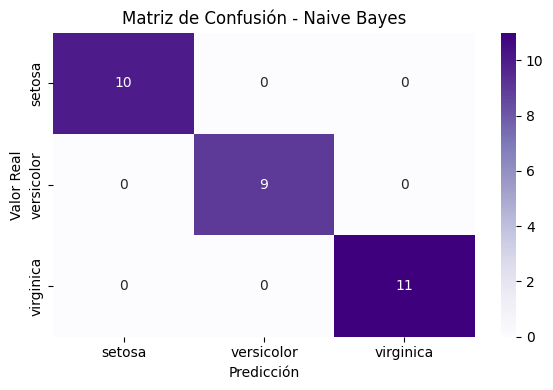

In [33]:
# 5. Evaluar
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 6. Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusión - Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


# Naive Bayes vs. LDA vs. QDA

## ¿Qué tienen en común?

- Los tres son **modelos de clasificación probabilística**.
- Usan el **Teorema de Bayes** para calcular probabilidades.
- Funcionan bien en problemas multiclase y son rápidos de entrenar.

---

## 1. Naive Bayes

- Supone que **las variables son independientes entre sí**.
- Para clasificación, elige la clase que maximiza:

$$
P(C_k | x) \propto P(x_1|C_k) \cdot P(x_2|C_k) \cdot \ldots \cdot P(C_k)
$$

- **Distribución**: asume que cada característica tiene su propia distribución (por ejemplo, Gaussiana en `GaussianNB`).

Ventajas:
- Muy rápido
- Robusto con pocos datos
Limita el rendimiento cuando hay correlación entre variables

---

## 2. LDA – Linear Discriminant Analysis

- Supone que **las variables siguen una distribución normal multivariada**.
- **No asume independencia entre variables** (a diferencia de NB).
- Asume que **todas las clases comparten la misma matriz de covarianza** (la forma de la elipse de datos es igual).

Frontera de decisión: **lineal**

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log(P(C_k))
$$

Ventajas:
- Mejor que NB cuando hay correlación entre variables
- Rápido y estable

---

## 3. QDA – Quadratic Discriminant Analysis

- Igual que LDA, **usa la distribución Gaussiana multivariada**, **pero permite una matriz de covarianza diferente para cada clase**.

Frontera de decisión: **cuadrática**

$$
\delta_k(x) = -\frac{1}{2} \log|\Sigma_k| - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1}(x - \mu_k) + \log(P(C_k))
$$

Ventajas:
- Más flexible que LDA (mejor si las clases tienen diferente forma)
- Requiere más datos (más parámetros a estimar)

---

## Comparación general

| Modelo       | Independencia| Covarianza                  | Frontera     |
|--------------|--------------|---------------------        |--------------|
| Naive Bayes  | Sí           | Diagonal (indep.)           | No lineal    |
| LDA          | No           | Igual para todas las clases | Lineal       |
| QDA          | No           | Una por clase               | Cuadrática   |



In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar dataset
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# 2. Separar y escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Modelos
model_nb = GaussianNB()
model_lda = LinearDiscriminantAnalysis()
model_qda = QuadraticDiscriminantAnalysis()

# 4. Entrenamiento
model_nb.fit(X_train, y_train)
model_lda.fit(X_train_scaled, y_train)
model_qda.fit(X_train_scaled, y_train)

# 5. Evaluación
def evaluar_modelo(nombre, modelo, X, y_true):
    y_pred = modelo.predict(X)
    print(f"{nombre}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=labels))
    print("-" * 50)

evaluar_modelo("Naive Bayes", model_nb, X_test, y_test)
evaluar_modelo("LDA", model_lda, X_test_scaled, y_test)
evaluar_modelo("QDA", model_qda, X_test_scaled, y_test)


Naive Bayes
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
LDA
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
QDA
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
     

 Modelo: Naive Bayes
Matriz de Confusión:
 [[86  6  8]
 [ 6 82  3]
 [ 9 12 88]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       100
           1       0.82      0.90      0.86        91
           2       0.89      0.81      0.85       109

    accuracy                           0.85       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

 Modelo: LDA
Matriz de Confusión:
 [[87  7  6]
 [13 73  5]
 [11  3 95]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.88      0.80      0.84        91
           2       0.90      0.87      0.88       109

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

 Modelo: QDA
Matriz de Confusión

c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Accuracy,F1_macro,Precision_macro,Recall_macro
Naive Bayes,0.853,0.854,0.853,0.856
LDA,0.850,0.849,0.853,0.848
QDA,0.887,0.886,0.888,0.886


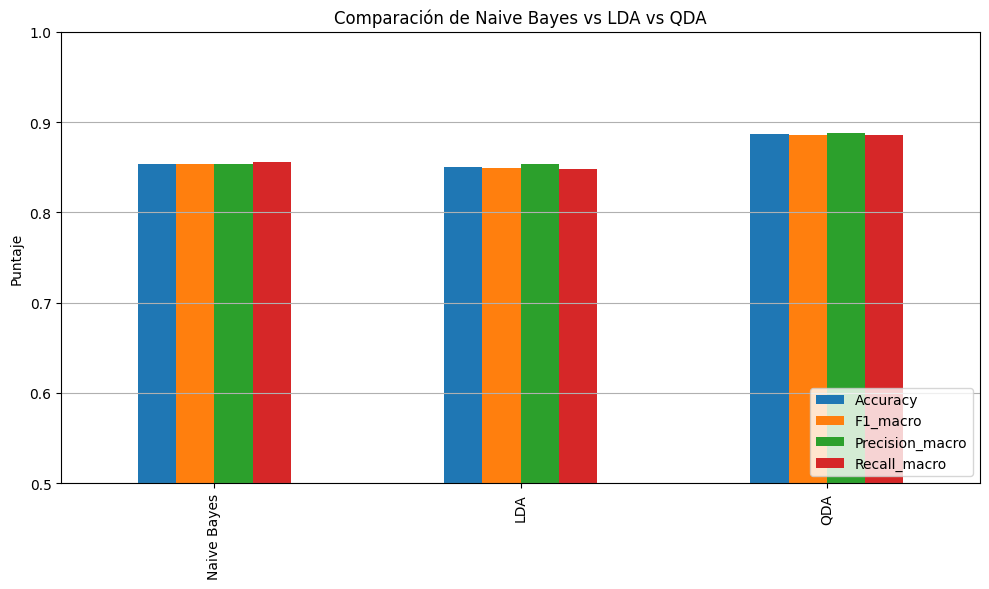

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1 Crear un dataset con ruido y clases poco separables
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3,
                           n_redundant=1, n_classes=3, n_clusters_per_class=1,
                           flip_y=0.05, class_sep=1.0, random_state=42)

# 2 Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3 Escalar los datos para LDA y QDA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4 Instanciar y entrenar los modelos
nb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

nb.fit(X_train, y_train)
lda.fit(X_train_scaled, y_train)
qda.fit(X_train_scaled, y_train)

# 5 Función para evaluar
def evaluar(nombre, modelo, X_eval):
    print(f" Modelo: {nombre}")
    y_pred = modelo.predict(X_eval)
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:\n", cm)
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
    return classification_report(y_test, y_pred, output_dict=True)

# 6 Evaluar los modelos
res_nb = evaluar("Naive Bayes", nb, X_test)
res_lda = evaluar("LDA", lda, X_test_scaled)
res_qda = evaluar("QDA", qda, X_test_scaled)

# 7 Crear DataFrame resumen
df_resultados = pd.DataFrame({
    "Naive Bayes": {
        "Accuracy": res_nb["accuracy"],
        "F1_macro": res_nb["macro avg"]["f1-score"],
        "Precision_macro": res_nb["macro avg"]["precision"],
        "Recall_macro": res_nb["macro avg"]["recall"]
    },
    "LDA": {
        "Accuracy": res_lda["accuracy"],
        "F1_macro": res_lda["macro avg"]["f1-score"],
        "Precision_macro": res_lda["macro avg"]["precision"],
        "Recall_macro": res_lda["macro avg"]["recall"]
    },
    "QDA": {
        "Accuracy": res_qda["accuracy"],
        "F1_macro": res_qda["macro avg"]["f1-score"],
        "Precision_macro": res_qda["macro avg"]["precision"],
        "Recall_macro": res_qda["macro avg"]["recall"]
    }
}).T

# 8 Mostrar tabla comparativa
print("\n Comparación de Modelos:\n")
display(df_resultados.round(3))

# 9 Visualizar comparación
df_resultados.plot(kind='bar', figsize=(10,6))
plt.title("Comparación de Naive Bayes vs LDA vs QDA")
plt.ylabel("Puntaje")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
